<h2>Apparel Stock Analysis<h2>

<h4>Nike<h4>

In [16]:
import yfinance as yf

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [18]:
import warnings
warnings.filterwarnings('ignore')

CREATING THE DATASET

In [19]:
df = yf.download('NKE', start='2020-01-01', end='2024-01-01').to_csv('Datasets/nike_stock.csv')

[*********************100%***********************]  1 of 1 completed


In [20]:
nike = pd.read_csv('../Datasets/nike_stock.csv')
nike

,Price,Close,High,Low,Open,Volume
0,Ticker,NKE,NKE,NKE,NKE,NKE
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,95.36821746826172,95.3775509900979,94.26709683150074,94.58437249941043,5644100
3,2020-01-03,95.10693359375,95.18158752791594,93.6045569857679,93.86583863595764,4541800
4,2020-01-06,95.0229263305664,95.03225273015106,94.12710073259969,94.20174752622184,4612400
...,...,...,...,...,...,...
1003,2023-12-22,104.98536682128906,107.66733492795588,104.41204414073968,105.19914790848757,46666200
1004,2023-12-26,104.96592712402344,105.61698972341972,104.44120116881932,105.2380168592794,12846700
1005,2023-12-27,104.1010971069336,105.51981745011808,103.8290147690198,105.27688573216825,10157900
1006,2023-12-28,105.7433090209961,106.30691233863952,103.79013609671432,104.17882829556108,9352900


In [21]:
nike = nike.drop([0,1],axis=0)

In [22]:
nike['Date'] = nike['Price']
nike = nike.drop('Price',axis=1)

In [23]:
nike

,Close,High,Low,Open,Volume,Date
2,95.36821746826172,95.3775509900979,94.26709683150074,94.58437249941043,5644100,2020-01-02
3,95.10693359375,95.18158752791594,93.6045569857679,93.86583863595764,4541800,2020-01-03
4,95.0229263305664,95.03225273015106,94.12710073259969,94.20174752622184,4612400,2020-01-06
5,94.97627258300781,95.87209824443295,94.07111340194787,95.00426602252274,6719900,2020-01-07
6,94.76165771484375,95.31221437997459,94.10844656574092,94.53769594517937,4942200,2020-01-08
...,...,...,...,...,...,...
1003,104.98536682128906,107.66733492795588,104.41204414073968,105.19914790848757,46666200,2023-12-22
1004,104.96592712402344,105.61698972341972,104.44120116881932,105.2380168592794,12846700,2023-12-26
1005,104.1010971069336,105.51981745011808,103.8290147690198,105.27688573216825,10157900,2023-12-27
1006,105.7433090209961,106.30691233863952,103.79013609671432,104.17882829556108,9352900,2023-12-28


In [24]:
for i in nike.columns:
    if i != 'Date':
        nike[i] = pd.to_numeric(nike[i])
    else:
        nike[i] = pd.to_datetime(nike[i])

In [25]:
nike.describe().round(2)

,Close,High,Low,Open,Volume
count,1006.00,1006.00,1006.00,1006.00,1006.00
mean,115.49,116.78,114.19,115.50,7271308.75
std,21.94,22.01,21.94,22.02,4231354.48
min,58.76,62.58,56.14,60.63,1821900.00
25%,99.54,100.70,98.62,99.55,5065750.00
50%,113.73,115.46,112.78,114.07,6275250.00
75%,128.18,129.79,126.68,128.24,8102450.00
max,168.18,169.68,166.27,167.08,48176100.00


STOCK ANALYSIS

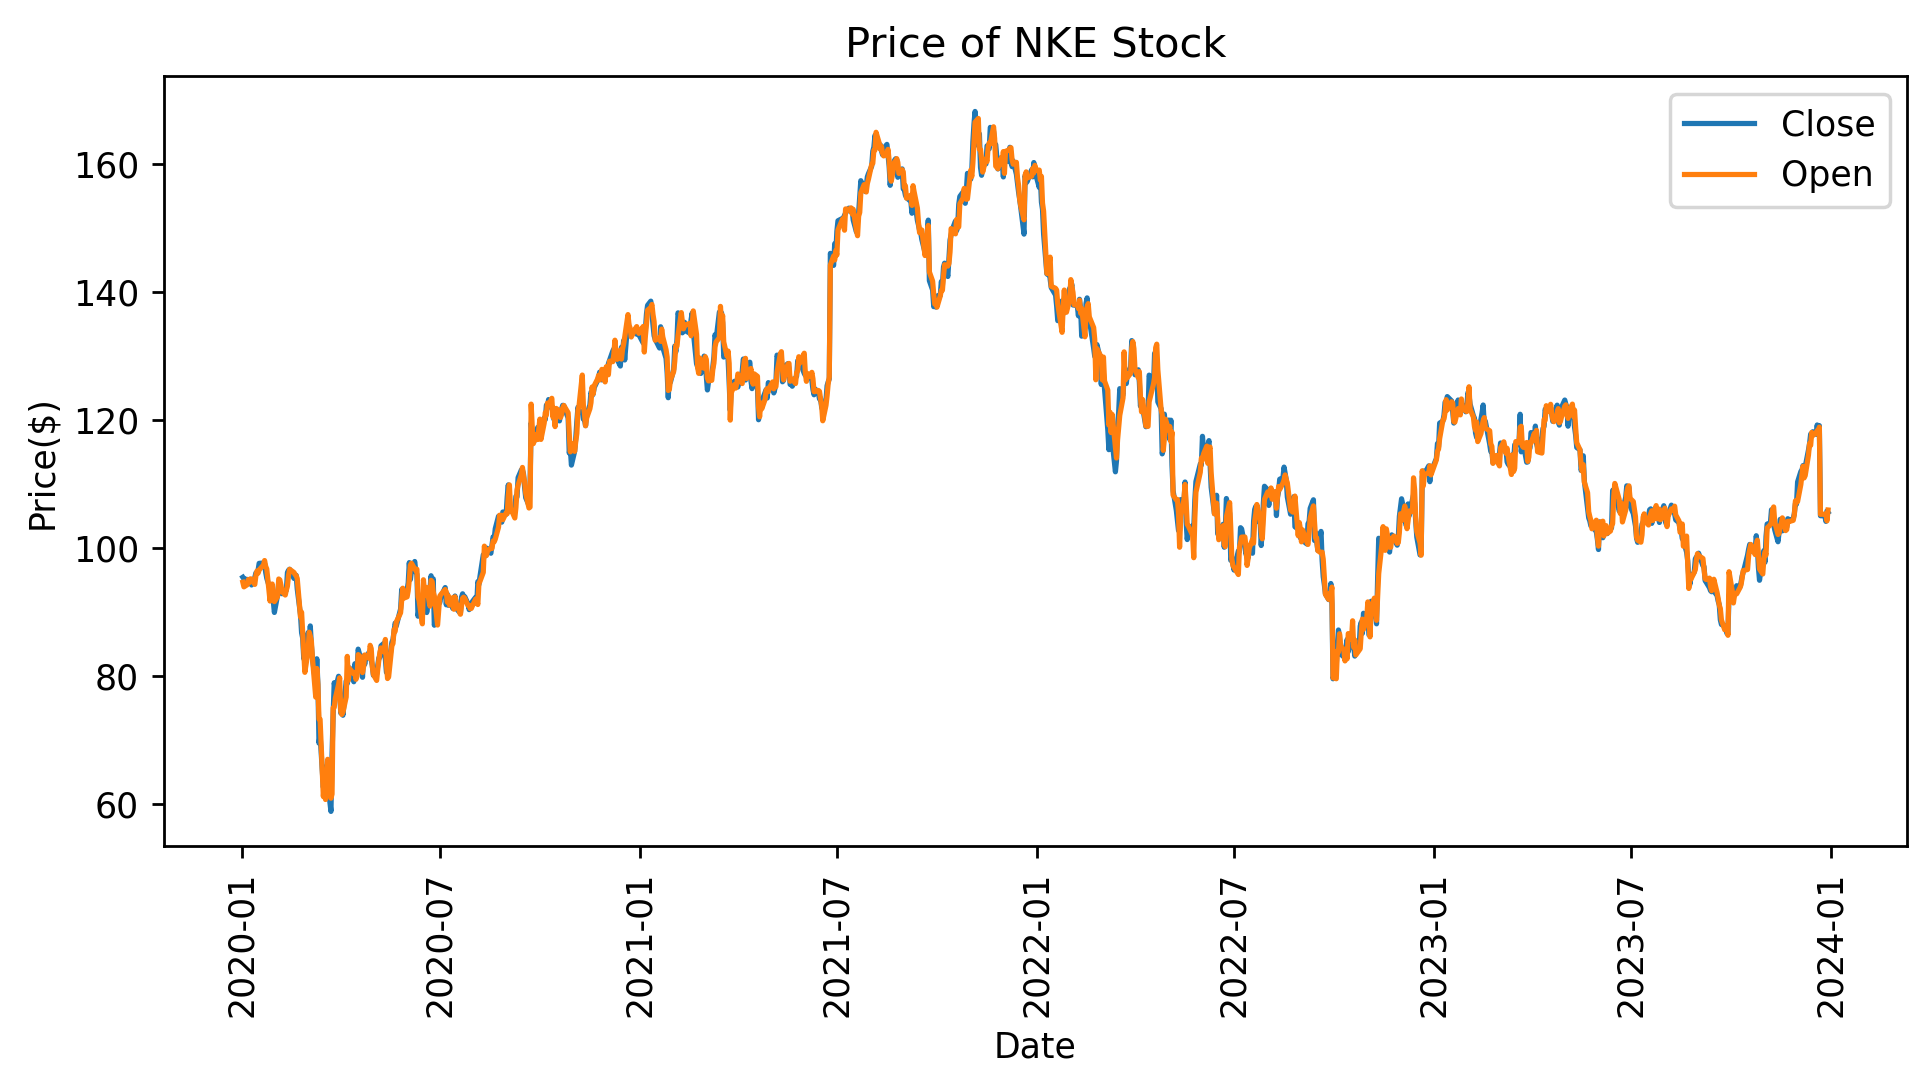

In [26]:
plt.figure(figsize=(9,4),dpi=250)
for col in ['Close', 'Open']:
    sns.lineplot(data=nike, x='Date', y=col, label=col)
plt.title('Price of NKE Stock')
plt.xticks(rotation=90)
plt.ylabel('Price($)')
plt.legend()
plt.show()

In [27]:
nike['Open-to-Close Return(%)'] = ((nike['Close'] - nike['Open'])/(nike['Open']))*100
nike['Day-to-day Return(%)'] = nike['Close'].pct_change() * 100
nike

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%)
2,95.368217,95.377551,94.267097,94.584372,5644100,2020-01-02,0.828726,NaN
3,95.106934,95.181588,93.604557,93.865839,4541800,2020-01-03,1.322201,-0.273974
4,95.022926,95.032253,94.127101,94.201748,4612400,2020-01-06,0.871724,-0.088329
5,94.976273,95.872098,94.071113,95.004266,6719900,2020-01-07,-0.029465,-0.049097
6,94.761658,95.312214,94.108447,94.537696,4942200,2020-01-08,0.236902,-0.225967
...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46666200,2023-12-22,-0.203216,-11.825676
1004,104.965927,105.616990,104.441201,105.238017,12846700,2023-12-26,-0.258547,-0.018517
1005,104.101097,105.519817,103.829015,105.276886,10157900,2023-12-27,-1.116854,-0.823915
1006,105.743309,106.306912,103.790136,104.178828,9352900,2023-12-28,1.501726,1.577516


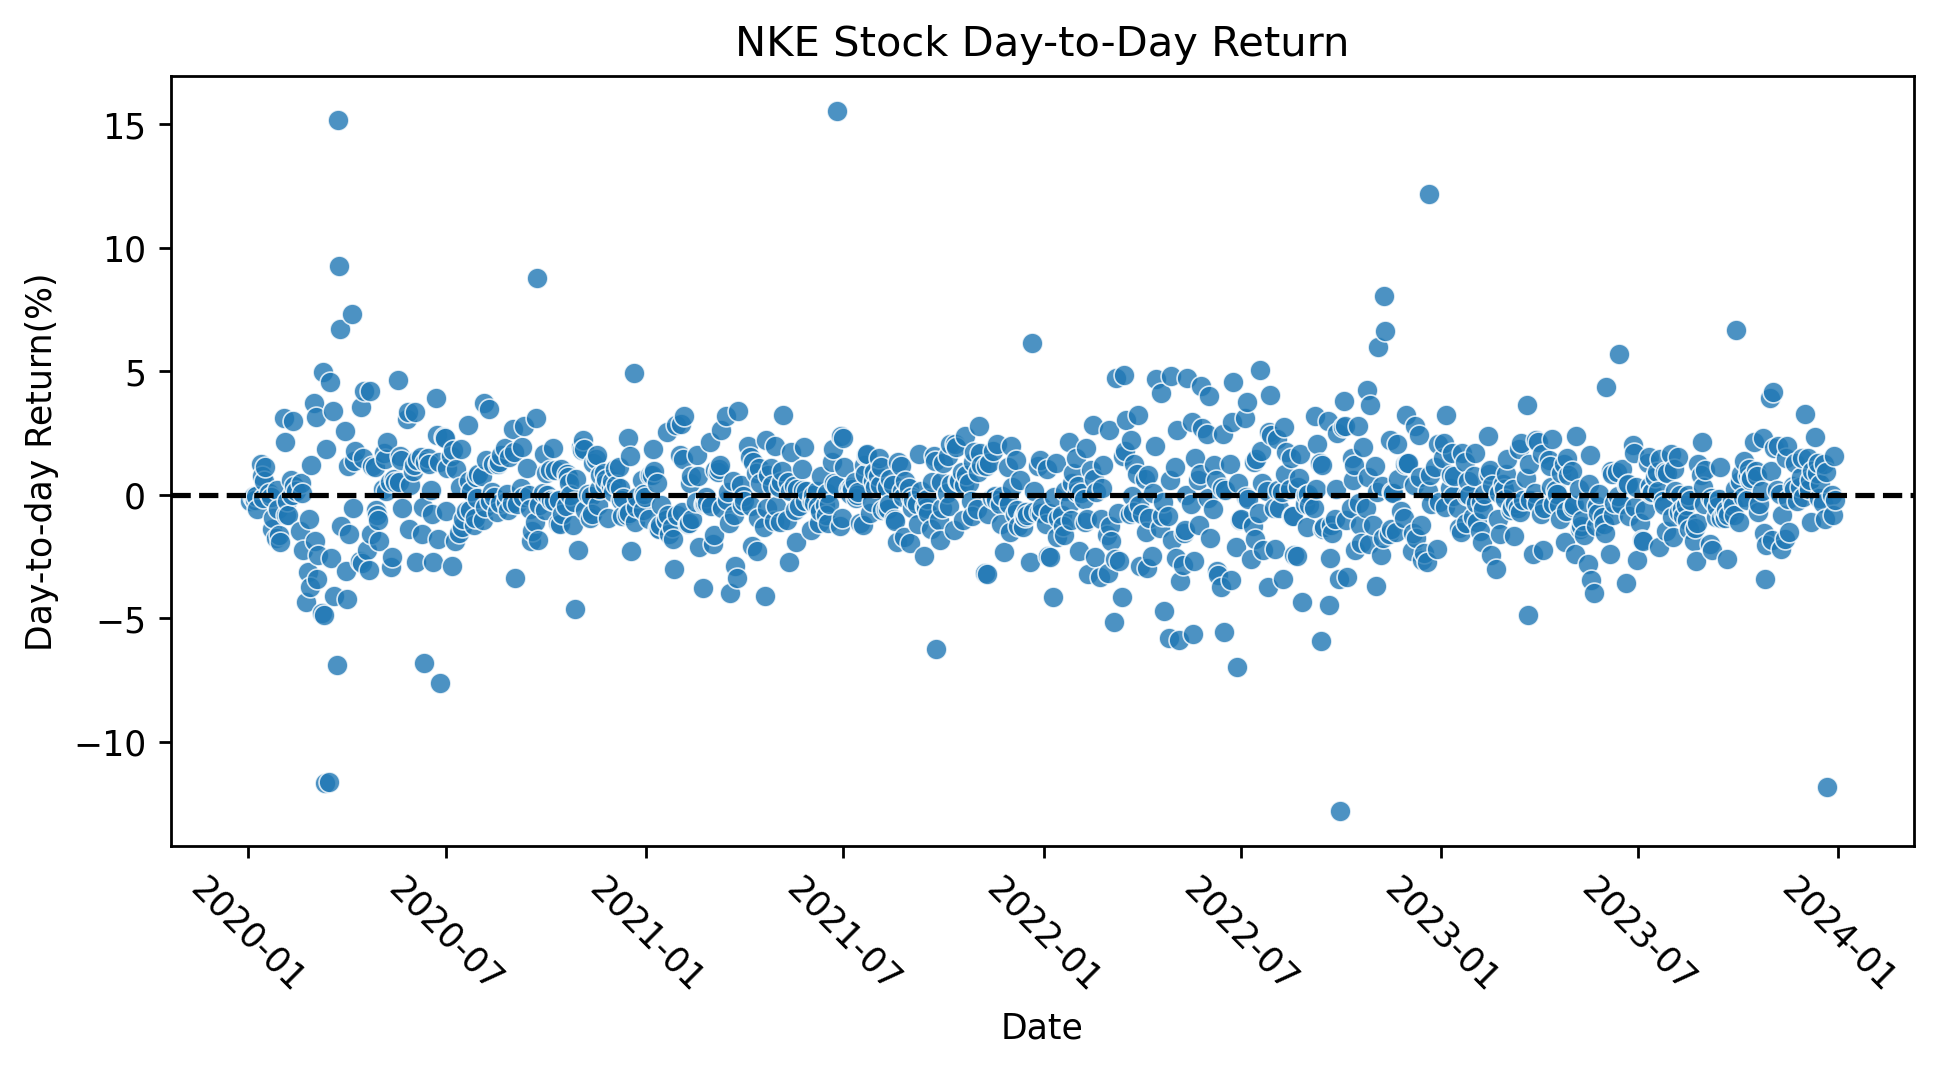

In [28]:
plt.figure(figsize=(9,4),dpi=250)
plt.title('NKE Stock Day-to-Day Return')
sns.scatterplot(data=nike, x='Date',y='Day-to-day Return(%)',alpha=0.8)
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=-45);

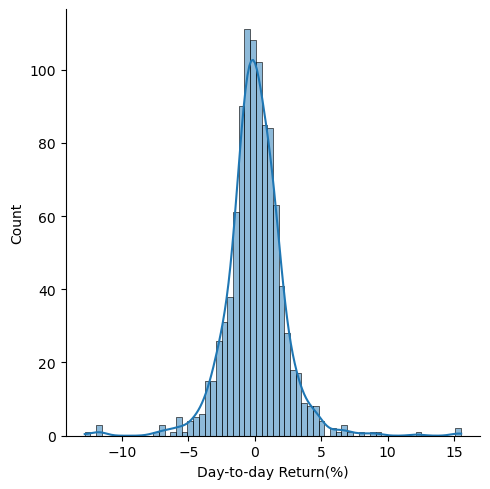

In [29]:
sns.displot(nike, x='Day-to-day Return(%)',kde=True);

In [30]:
nike['NextDayReturn'] = (nike['Close'].shift(-1) > nike['Close']).astype(int)

In [31]:
nike

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn
2,95.368217,95.377551,94.267097,94.584372,5644100,2020-01-02,0.828726,NaN,0
3,95.106934,95.181588,93.604557,93.865839,4541800,2020-01-03,1.322201,-0.273974,0
4,95.022926,95.032253,94.127101,94.201748,4612400,2020-01-06,0.871724,-0.088329,0
5,94.976273,95.872098,94.071113,95.004266,6719900,2020-01-07,-0.029465,-0.049097,0
6,94.761658,95.312214,94.108447,94.537696,4942200,2020-01-08,0.236902,-0.225967,0
...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46666200,2023-12-22,-0.203216,-11.825676,0
1004,104.965927,105.616990,104.441201,105.238017,12846700,2023-12-26,-0.258547,-0.018517,0
1005,104.101097,105.519817,103.829015,105.276886,10157900,2023-12-27,-1.116854,-0.823915,1
1006,105.743309,106.306912,103.790136,104.178828,9352900,2023-12-28,1.501726,1.577516,0


In [32]:
corr = nike.corr()

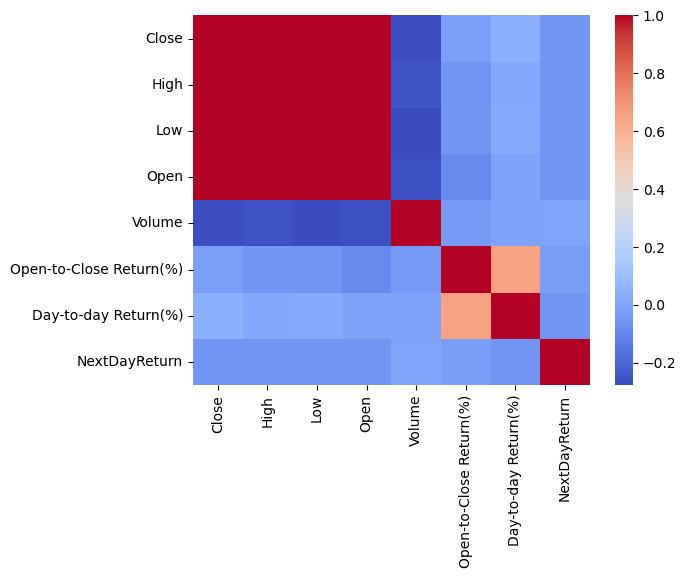

In [33]:
sns.heatmap(corr, annot=False,cmap='coolwarm');

In [34]:
nike['SMA20'] = nike['Close'].rolling(window=20).mean()

In [35]:
nike

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20
2,95.368217,95.377551,94.267097,94.584372,5644100,2020-01-02,0.828726,NaN,0,NaN
3,95.106934,95.181588,93.604557,93.865839,4541800,2020-01-03,1.322201,-0.273974,0,NaN
4,95.022926,95.032253,94.127101,94.201748,4612400,2020-01-06,0.871724,-0.088329,0,NaN
5,94.976273,95.872098,94.071113,95.004266,6719900,2020-01-07,-0.029465,-0.049097,0,NaN
6,94.761658,95.312214,94.108447,94.537696,4942200,2020-01-08,0.236902,-0.225967,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46666200,2023-12-22,-0.203216,-11.825676,0,112.940046
1004,104.965927,105.616990,104.441201,105.238017,12846700,2023-12-26,-0.258547,-0.018517,0,112.960561
1005,104.101097,105.519817,103.829015,105.276886,10157900,2023-12-27,-1.116854,-0.823915,1,112.899581
1006,105.743309,106.306912,103.790136,104.178828,9352900,2023-12-28,1.501726,1.577516,0,112.842265


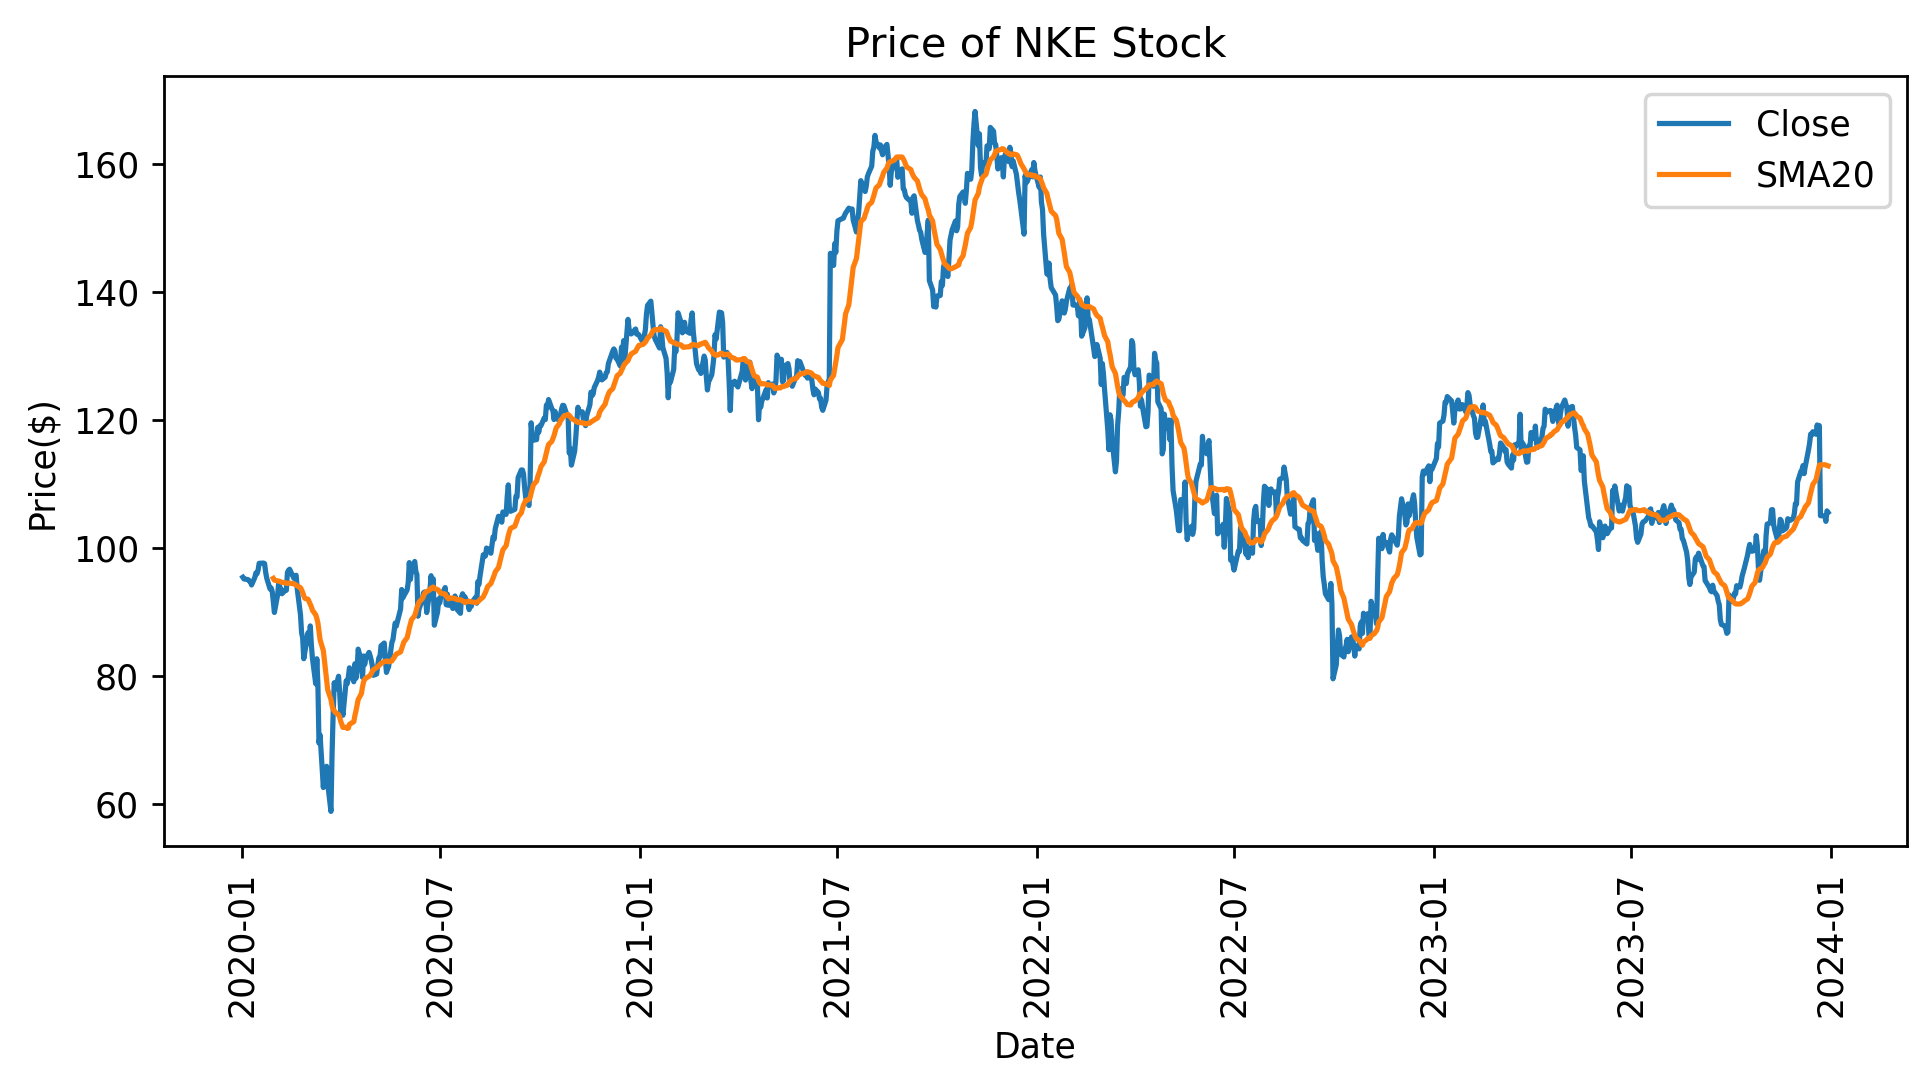

In [36]:
plt.figure(figsize=(9,4),dpi=250)
for col in ['Close', 'SMA20']:
    sns.lineplot(data=nike, x='Date', y=col, label=col)
plt.title('Price of NKE Stock')
plt.xticks(rotation=90)
plt.ylabel('Price($)')
plt.legend()
plt.show()

DateTime Analysis

In [37]:
nike['Month'] = nike['Date'].dt.month
nike['Year'] = nike['Date'].dt.year
nike['DayofWeek'] = nike['Date'].dt.day_of_week
nike

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20,Month,Year,DayofWeek
2,95.368217,95.377551,94.267097,94.584372,5644100,2020-01-02,0.828726,NaN,0,NaN,1,2020,3
3,95.106934,95.181588,93.604557,93.865839,4541800,2020-01-03,1.322201,-0.273974,0,NaN,1,2020,4
4,95.022926,95.032253,94.127101,94.201748,4612400,2020-01-06,0.871724,-0.088329,0,NaN,1,2020,0
5,94.976273,95.872098,94.071113,95.004266,6719900,2020-01-07,-0.029465,-0.049097,0,NaN,1,2020,1
6,94.761658,95.312214,94.108447,94.537696,4942200,2020-01-08,0.236902,-0.225967,0,NaN,1,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46666200,2023-12-22,-0.203216,-11.825676,0,112.940046,12,2023,4
1004,104.965927,105.616990,104.441201,105.238017,12846700,2023-12-26,-0.258547,-0.018517,0,112.960561,12,2023,1
1005,104.101097,105.519817,103.829015,105.276886,10157900,2023-12-27,-1.116854,-0.823915,1,112.899581,12,2023,2
1006,105.743309,106.306912,103.790136,104.178828,9352900,2023-12-28,1.501726,1.577516,0,112.842265,12,2023,3


In [38]:
month_closing = nike.groupby('Month')['Close'].mean()
month_closing


Month
1     122.267086
2     119.629042
3     111.022701
4     111.812978
5     108.512030
6     108.782905
7     112.794628
8     117.305376
9     112.797138
10    112.643404
11    121.259069
12    127.871097
Name: Close, dtype: float64

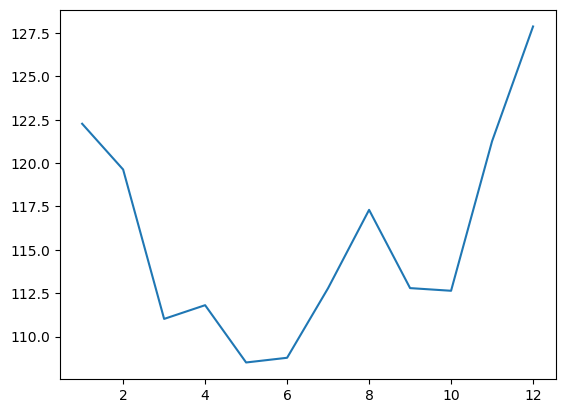

In [39]:
plt.plot(month_closing);

In [40]:
month_returns = nike.groupby('Month')['Day-to-day Return(%)'].mean()
month_returns

Month
1    -0.181214
2    -0.263631
3    -0.010346
4     0.032766
5    -0.071918
6     0.065679
7     0.245874
8    -0.029295
9    -0.344542
10    0.336616
11    0.459598
12    0.138169
Name: Day-to-day Return(%), dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Day-to-day Return(%)'>

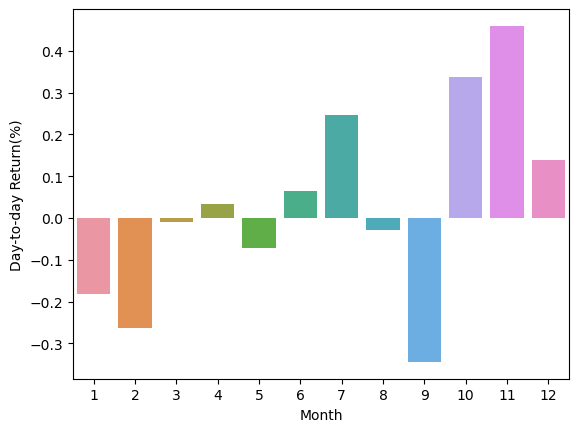

In [41]:
sns.barplot(x=month_returns.index, y=month_returns)

<AxesSubplot:xlabel='DayofWeek', ylabel='count'>

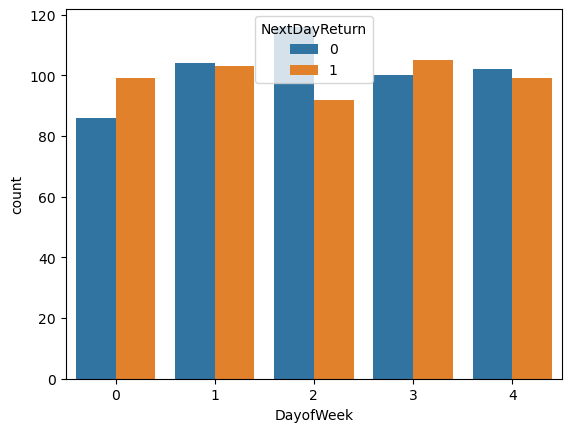

In [42]:
sns.countplot(data=nike,x='DayofWeek',hue='NextDayReturn')

Volatility

In [43]:
nike['volatility'] = nike['Day-to-day Return(%)'].rolling(window=20).std()
nike['volatility']

2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
          ...   
1003    2.985921
1004    2.985550
1005    2.987526
1006    2.989915
1007    2.990278
Name: volatility, Length: 1006, dtype: float64

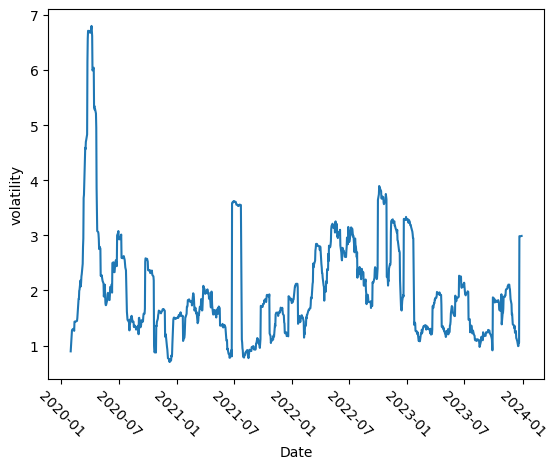

In [44]:
sns.lineplot(data=nike,x='Date',y='volatility')
plt.xticks(rotation=-45);

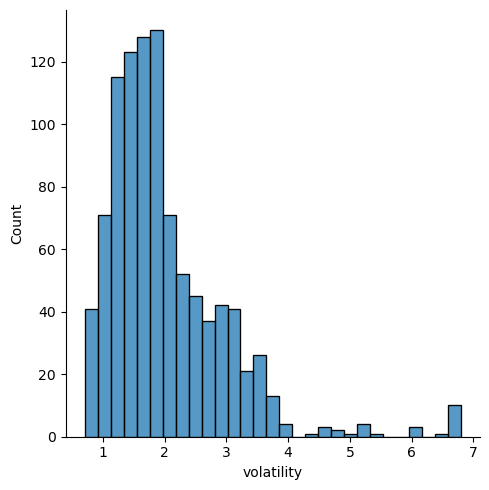

In [45]:
sns.displot(data=nike,x='volatility')

<h2>Stock Prediction using Models<h2>

Data Preperation / Cleaning

In [46]:
nike

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20,Month,Year,DayofWeek,volatility
2,95.368217,95.377551,94.267097,94.584372,5644100,2020-01-02,0.828726,NaN,0,NaN,1,2020,3,NaN
3,95.106934,95.181588,93.604557,93.865839,4541800,2020-01-03,1.322201,-0.273974,0,NaN,1,2020,4,NaN
4,95.022926,95.032253,94.127101,94.201748,4612400,2020-01-06,0.871724,-0.088329,0,NaN,1,2020,0,NaN
5,94.976273,95.872098,94.071113,95.004266,6719900,2020-01-07,-0.029465,-0.049097,0,NaN,1,2020,1,NaN
6,94.761658,95.312214,94.108447,94.537696,4942200,2020-01-08,0.236902,-0.225967,0,NaN,1,2020,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46666200,2023-12-22,-0.203216,-11.825676,0,112.940046,12,2023,4,2.985921
1004,104.965927,105.616990,104.441201,105.238017,12846700,2023-12-26,-0.258547,-0.018517,0,112.960561,12,2023,1,2.985550
1005,104.101097,105.519817,103.829015,105.276886,10157900,2023-12-27,-1.116854,-0.823915,1,112.899581,12,2023,2,2.987526
1006,105.743309,106.306912,103.790136,104.178828,9352900,2023-12-28,1.501726,1.577516,0,112.842265,12,2023,3,2.989915


In [47]:
nike.isnull().sum()

Close                       0
High                        0
Low                         0
Open                        0
Volume                      0
Date                        0
Open-to-Close Return(%)     0
Day-to-day Return(%)        1
NextDayReturn               0
SMA20                      19
Month                       0
Year                        0
DayofWeek                   0
volatility                 20
dtype: int64

In [48]:
nikeDF = nike.dropna(axis=0)

In [49]:
nikeDF.head(10)

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20,Month,Year,DayofWeek,volatility
22,89.862595,91.868867,89.507992,91.551598,8780300,2020-01-31,-1.844866,-1.924862,1,94.917025,1,2020,4,0.895428
23,92.634048,94.173752,91.980845,92.382100,9727000,2020-02-03,0.272724,3.084102,1,94.793381,2,2020,0,1.171481
24,94.603012,95.909427,94.491038,95.097589,6559600,2020-02-04,-0.520073,2.125529,0,94.772385,2,2020,1,1.275150
25,93.819183,95.153592,92.876697,94.957631,6108300,2020-02-05,-1.198901,-0.828545,0,94.714531,2,2020,2,1.288110
26,93.567223,94.742997,93.464582,94.155113,5641800,2020-02-06,-0.624385,-0.268560,0,94.654809,2,2020,3,1.288445
27,92.792709,93.688535,92.354126,93.137971,4121800,2020-02-07,-0.370699,-0.827761,1,94.559627,2,2020,4,1.299981
28,93.333939,93.791189,92.382126,92.587421,4213900,2020-02-10,0.806284,0.583267,0,94.518569,2,2020,0,1.303272
29,93.333939,93.641881,92.792715,93.380599,4871800,2020-02-11,-0.049968,0.000000,1,94.418723,2,2020,1,1.267927
30,96.114723,96.189377,93.725855,94.005796,8075600,2020-02-12,2.243401,2.979393,1,94.422455,2,2020,2,1.433760
31,96.459999,96.805261,94.882969,95.657487,5386800,2020-02-13,0.838943,0.359233,1,94.449516,2,2020,3,1.435376


In [50]:
nikeDF.isnull().sum() == 0

Close                      True
High                       True
Low                        True
Open                       True
Volume                     True
Date                       True
Open-to-Close Return(%)    True
Day-to-day Return(%)       True
NextDayReturn              True
SMA20                      True
Month                      True
Year                       True
DayofWeek                  True
volatility                 True
dtype: bool

In [51]:
winsorizedClosing = winsorize(nikeDF['Open-to-Close Return(%)'],(0.05,0.05)).data
nikeDF['Open-to-Close Return(%)'] = winsorizedClosing

In [52]:
winsorizedRet = winsorize(nikeDF['Day-to-day Return(%)'],(0.05,0.05)).data
nikeDF['Day-to-day Return(%)'] = winsorizedRet

In [53]:
winsorizedVol = winsorize(nikeDF['volatility'],(0.05,0.05)).data
nikeDF['volatility'] = winsorizedVol

In [54]:
nikeDF

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20,Month,Year,DayofWeek,volatility
22,89.862595,91.868867,89.507992,91.551598,8780300,2020-01-31,-1.844866,-1.924862,1,94.917025,1,2020,4,0.930658
23,92.634048,94.173752,91.980845,92.382100,9727000,2020-02-03,0.272724,3.084102,1,94.793381,2,2020,0,1.171481
24,94.603012,95.909427,94.491038,95.097589,6559600,2020-02-04,-0.520073,2.125529,0,94.772385,2,2020,1,1.275150
25,93.819183,95.153592,92.876697,94.957631,6108300,2020-02-05,-1.198901,-0.828545,0,94.714531,2,2020,2,1.288110
26,93.567223,94.742997,93.464582,94.155113,5641800,2020-02-06,-0.624385,-0.268560,0,94.654809,2,2020,3,1.288445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46666200,2023-12-22,-0.203216,-3.198726,0,112.940046,12,2023,4,2.985921
1004,104.965927,105.616990,104.441201,105.238017,12846700,2023-12-26,-0.258547,-0.018517,0,112.960561,12,2023,1,2.985550
1005,104.101097,105.519817,103.829015,105.276886,10157900,2023-12-27,-1.116854,-0.823915,1,112.899581,12,2023,2,2.987526
1006,105.743309,106.306912,103.790136,104.178828,9352900,2023-12-28,1.501726,1.577516,0,112.842265,12,2023,3,2.989915


Logistic Regression

In [55]:
nikeDum = pd.get_dummies(nikeDF, columns=['Month', 'Year', 'DayofWeek'], drop_first=True)

In [56]:
nikeDum

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20,...,Month_10,Month_11,Month_12,Year_2021,Year_2022,Year_2023,DayofWeek_1,DayofWeek_2,DayofWeek_3,DayofWeek_4
22,89.862595,91.868867,89.507992,91.551598,8780300,2020-01-31,-1.844866,-1.924862,1,94.917025,...,0,0,0,0,0,0,0,0,0,1
23,92.634048,94.173752,91.980845,92.382100,9727000,2020-02-03,0.272724,3.084102,1,94.793381,...,0,0,0,0,0,0,0,0,0,0
24,94.603012,95.909427,94.491038,95.097589,6559600,2020-02-04,-0.520073,2.125529,0,94.772385,...,0,0,0,0,0,0,1,0,0,0
25,93.819183,95.153592,92.876697,94.957631,6108300,2020-02-05,-1.198901,-0.828545,0,94.714531,...,0,0,0,0,0,0,0,1,0,0
26,93.567223,94.742997,93.464582,94.155113,5641800,2020-02-06,-0.624385,-0.268560,0,94.654809,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46666200,2023-12-22,-0.203216,-3.198726,0,112.940046,...,0,0,1,0,0,1,0,0,0,1
1004,104.965927,105.616990,104.441201,105.238017,12846700,2023-12-26,-0.258547,-0.018517,0,112.960561,...,0,0,1,0,0,1,1,0,0,0
1005,104.101097,105.519817,103.829015,105.276886,10157900,2023-12-27,-1.116854,-0.823915,1,112.899581,...,0,0,1,0,0,1,0,1,0,0
1006,105.743309,106.306912,103.790136,104.178828,9352900,2023-12-28,1.501726,1.577516,0,112.842265,...,0,0,1,0,0,1,0,0,1,0


In [57]:
X = nikeDum.drop(['Date','NextDayReturn'],axis=1)
y = nikeDum['NextDayReturn']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegressionCV

log_model = LogisticRegressionCV()

In [62]:
log_model.fit(X_train_sc,y_train)

LogisticRegressionCV()

In [63]:
log_model.C_

array([2.7825594])

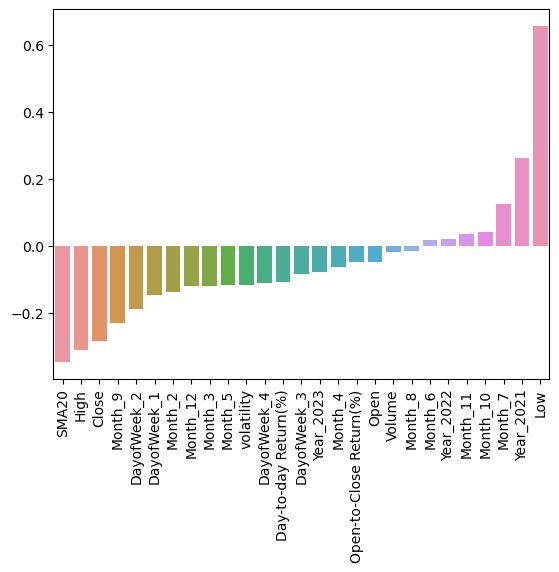

In [64]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0]).sort_values()
sns.barplot(x=coefs.index,y=coefs.values)
plt.xticks(rotation=90);

In [65]:
from sklearn.metrics import classification_report

yPreds = log_model.predict(X_test_sc)

In [66]:
print(classification_report(y_test,yPreds))

              precision    recall  f1-score   support

           0       0.47      0.39      0.42       103
           1       0.44      0.52      0.47        95

    accuracy                           0.45       198
   macro avg       0.45      0.45      0.45       198
weighted avg       0.45      0.45      0.45       198



RandomForest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
rfc = RandomForestClassifier()

In [69]:
n_estimators = [64,100,128,175]
max_features = ['auto','log2','sqrt']
bootstrap = [True,False]
oob_score = [True,False]

In [70]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score
}

In [71]:
grid = GridSearchCV(rfc,param_grid)

In [72]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [64, 100, 128, 175],
                         'oob_score': [True, False]})

In [73]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'n_estimators': 175,
 'oob_score': True}

In [74]:
pred = grid.predict(X_test)

In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.53      0.52      0.53       103
           1       0.49      0.51      0.50        95

    accuracy                           0.52       198
   macro avg       0.51      0.51      0.51       198
weighted avg       0.52      0.52      0.52       198

